In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import requests
import geopandas as gpd
%matplotlib inline

### Let's start by loading the Excel spreadsheets into pandas DataFrames. 

In [3]:
data_path = './data'
#act = pd.read_excel(f'{data_path}/ACT.xlsx')
#act_disag = pd.read_excel(f'{data_path}/ACT_DESAGREGADO.xlsx')
#adherence = pd.read_excel(f'{data_path}/Adherencia.xlsx')
#familiar_records = pd.read_excel(f'{data_path}/Antecedentes_familiares.xlsx')
#pathological_records = pd.read_excel(f'{data_path}/Antecedentes_patologicos.xlsx')
#diagnostics_aids = pd.read_excel(f'{data_path}/Ayudas_diagnosticas.xlsx')
#biologics_asthma = pd.read_excel(f'{data_path}/Biologicos Asma.xlsx')
life_quality = pd.read_excel(f'{data_path}/Calidad de vida relacioada en salud.xlsx')
#basic_info = pd.read_excel(f'{data_path}/Datos basicos.xlsx')
#dyspnea = pd.read_excel(f'{data_path}/Disnea.xlsx')
#ram_pharmacovigilance = pd.read_excel(f'{data_path}/Farmacovigilancia RAM.xlsx')
#habits = pd.read_excel(f'{data_path}/Habitos.xlsx')
#hospitalizations = pd.read_excel(f'{data_path}/Hospitalizaciones.xlsx')
#collecting_issues = pd.read_excel(f'{data_path}/Incosistencias en reclamacion.xlsx')
#medicines = pd.read_excel(f'{data_path}/Medicamentos.xlsx')
#height_weight = pd.read_excel(f'{data_path}/Mediciones de peso y talla.xlsx')
#emergencies = pd.read_excel(f'{data_path}/Urgencias.xlsx')
#vaccines = pd.read_excel(f'{data_path}/Vacunacion.xlsx')

### Calidad de vida

In [4]:
life_quality.head()

,Identificacion,FE_ALTA,Dimensiones,0_100
0,1645342,2016-09-27,Entorno,75.0
1,1645342,2016-09-27,Psicologico,81.0
2,1645342,2016-09-27,Relaciones interpersonales,100.0
3,1645342,2016-09-27,Salud fisica,25.0
4,1645342,2017-12-21,Entorno,63.0


In [5]:
life_quality.columns = [col.lower() for col in life_quality.columns]
life_quality.rename(columns={
    'identificacion': 'id_paciente',
    'fe_alta': 'fecha_alta',
    '0_100': 'calificacion'    
}, inplace=True)
life_quality.head()

,id_paciente,fecha_alta,dimensiones,calificacion
0,1645342,2016-09-27,Entorno,75.0
1,1645342,2016-09-27,Psicologico,81.0
2,1645342,2016-09-27,Relaciones interpersonales,100.0
3,1645342,2016-09-27,Salud fisica,25.0
4,1645342,2017-12-21,Entorno,63.0


In [6]:
life_quality['dimensiones'].unique()

array(['Entorno', 'Psicologico', 'Relaciones interpersonales',
       'Salud fisica'], dtype=object)

In [7]:
life_quality['dimensiones'] = life_quality['dimensiones'].astype('category')

In [8]:
life_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 4 columns):
id_paciente     1016 non-null int64
fecha_alta      1016 non-null datetime64[ns]
dimensiones     1016 non-null category
calificacion    1012 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 25.1 KB


In [9]:
life_quality.describe(include='all')

,id_paciente,fecha_alta,dimensiones,calificacion
count,1.016000e+03,1016,1016,1012.000000
unique,NaN,175,4,NaN
top,NaN,2017-03-06 00:00:00,Salud fisica,NaN
freq,NaN,32,254,NaN
first,NaN,2014-11-04 00:00:00,NaN,NaN
last,NaN,2019-02-21 00:00:00,NaN,NaN
mean,1.258658e+06,NaN,NaN,67.318182
std,4.093158e+05,NaN,NaN,18.585210
min,5.029890e+05,NaN,NaN,6.000000
25%,9.165100e+05,NaN,NaN,56.000000


In [10]:
life_quality.drop_duplicates(inplace=True)

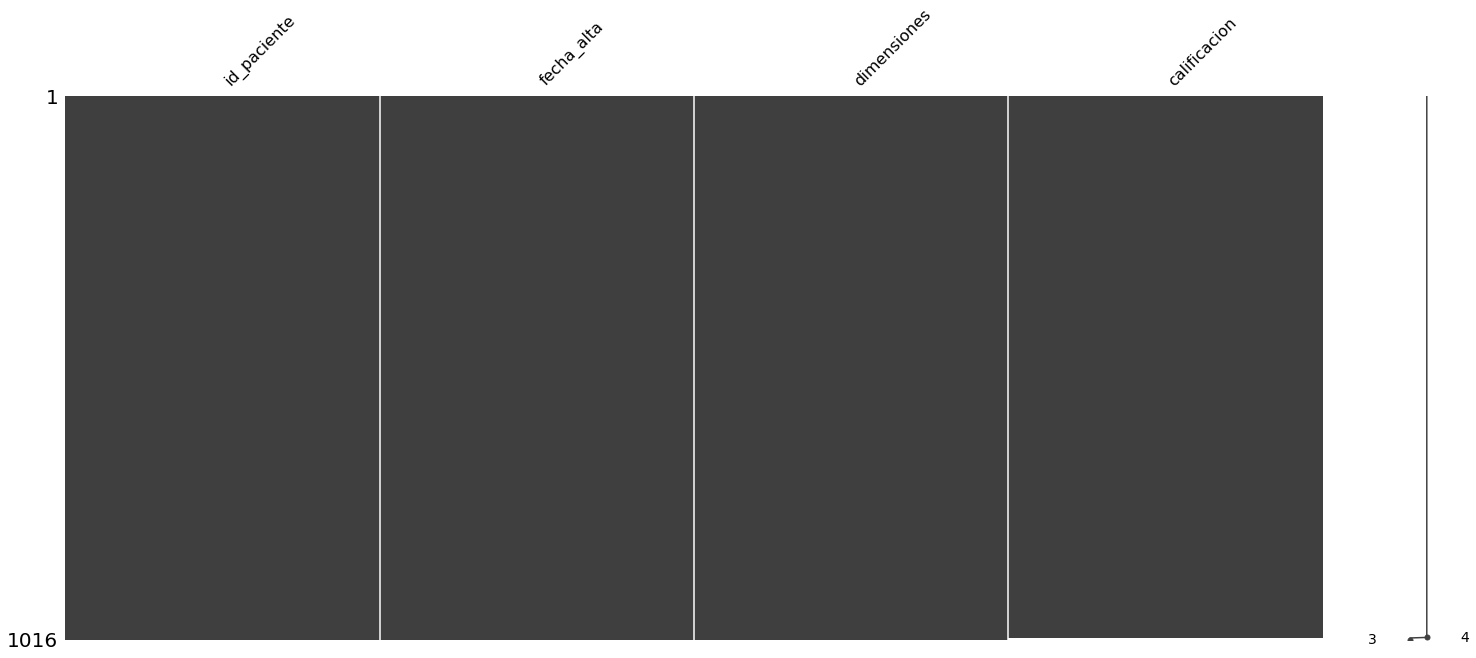

In [11]:
msno.matrix(msno.nullity_sort(life_quality, sort='descending'))

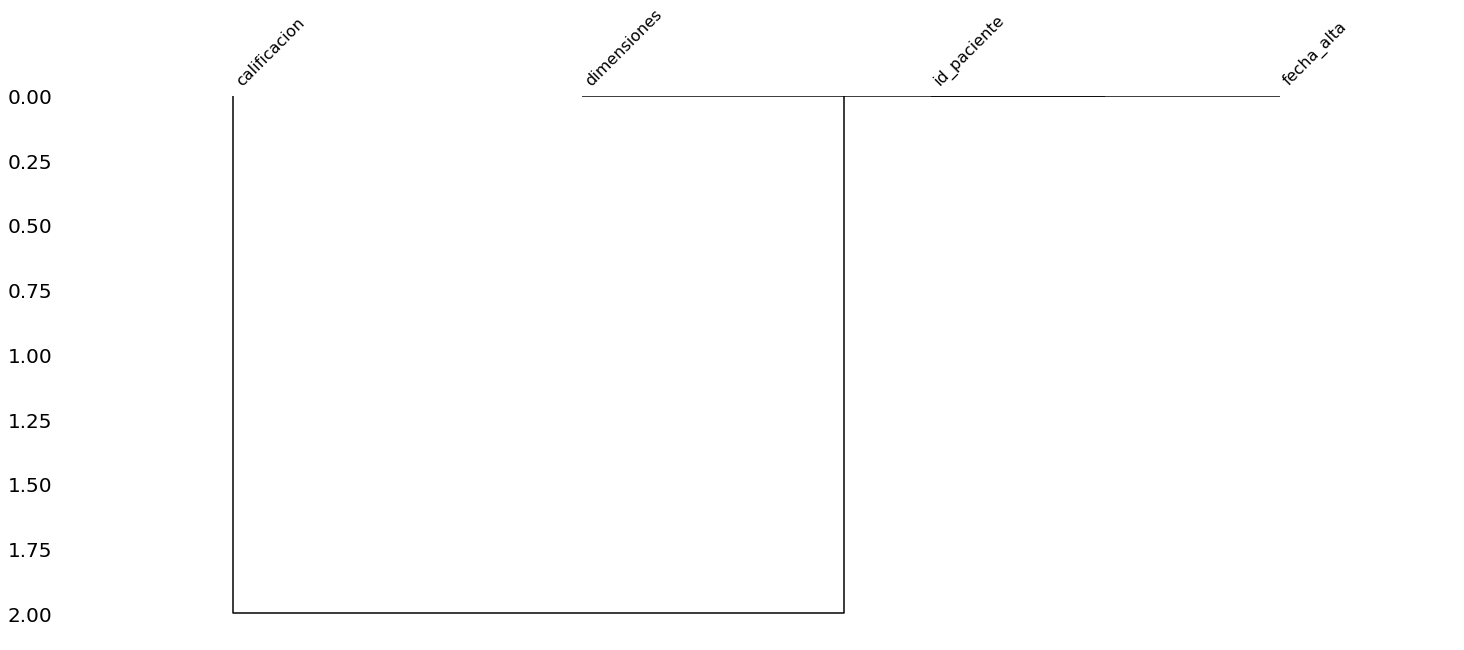

In [12]:
msno.dendrogram(life_quality)

In [13]:
life_quality.groupby('dimensiones').count()

,id_paciente,fecha_alta,calificacion
dimensiones,,,
Entorno,254,254,253
Psicologico,254,254,253
Relaciones interpersonales,254,254,253
Salud fisica,254,254,253


In [14]:
life_quality[life_quality['calificacion'].isna()]

,id_paciente,fecha_alta,dimensiones,calificacion
84,1971217,2017-07-25,Entorno,NaN
85,1971217,2017-07-25,Psicologico,NaN
86,1971217,2017-07-25,Relaciones interpersonales,NaN
87,1971217,2017-07-25,Salud fisica,NaN


In [15]:
life_quality.dropna(inplace=True)

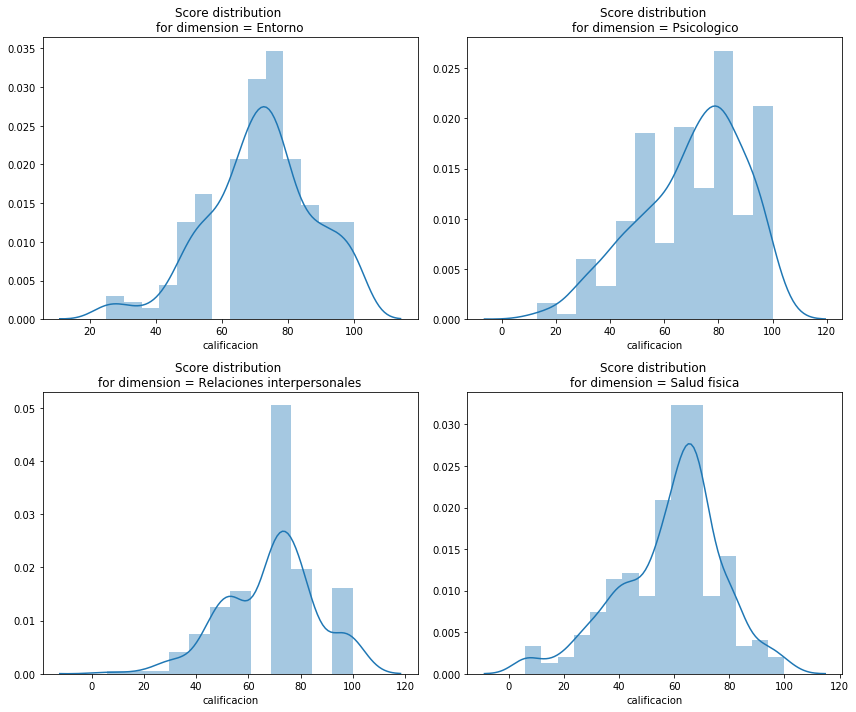

In [16]:
plt.figure(figsize=(12,10))

for i, dim in enumerate(life_quality['dimensiones'].cat.categories):
    plt.subplot(2,2,i+1)
    sns.distplot(life_quality.loc[(life_quality['dimensiones'] == dim),'calificacion'], label=dim)
    plt.title("Score distribution \nfor dimension = " + str(dim));

plt.tight_layout()

In [17]:
life_quality.sort_values(by=['id_paciente', 'fecha_alta']).head(20)

,id_paciente,fecha_alta,dimensiones,calificacion
988,502989,2017-01-03,Entorno,63.0
989,502989,2017-01-03,Psicologico,69.0
990,502989,2017-01-03,Relaciones interpersonales,50.0
991,502989,2017-01-03,Salud fisica,63.0
640,524006,2015-09-10,Entorno,56.0
641,524006,2015-09-10,Psicologico,69.0
642,524006,2015-09-10,Relaciones interpersonales,44.0
643,524006,2015-09-10,Salud fisica,44.0
644,524006,2015-11-18,Entorno,100.0
645,524006,2015-11-18,Psicologico,94.0


In [18]:
len(life_quality['id_paciente'].unique())

145

,id_paciente,count
0,739693,9
1,1617372,8
2,1427481,7
3,1690591,6
4,1764814,6


253


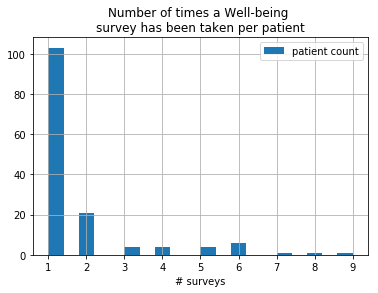

In [19]:
num_surveys_per_patient = life_quality[life_quality['dimensiones']=='Entorno'].groupby('id_paciente').size().sort_values(ascending=False).reset_index(name='count')
display(num_surveys_per_patient.head())
print(sum(num_surveys_per_patient['count']))
num_surveys_per_patient.hist('count', bins=20)
plt.xlabel('# surveys')
plt.title('Number of times a Well-being \nsurvey has been taken per patient')
plt.legend(['patient count'])

In [22]:
life_quality[life_quality['dimensiones']=='Entorno'][['anio_alta', 'id_paciente']].groupby('anio_alta').size()

anio_alta
2014      1
2015     25
2016     58
2017    146
2018     22
2019      1
dtype: int64

Text(0.5,0,'Year')

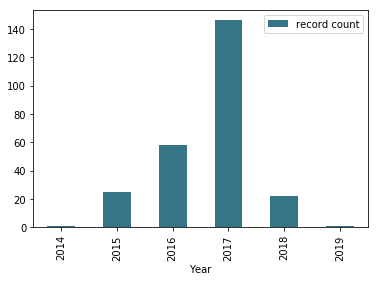

In [21]:
life_quality['anio_alta'] = life_quality['fecha_alta'].dt.year
ax = life_quality[life_quality['dimensiones']=='Entorno'][['anio_alta', 'id_paciente']].groupby('anio_alta').size().plot(kind='bar', color='#367588')
ax.legend(['record count'])
ax.set_xlabel('Year')

### Cleansed dataset:

In [76]:
life_quality.to_csv('./data/cleansed/calidad_de_vida.csv', sep='|')